In [117]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
def component_prob(v_comp, B):
    return np.sqrt(B / np.pi) * np.exp(-B * v_comp ** 2) * np.average(np.diff(v_comp))

def speed_distr_analytic(v_sq):
    B = 1. / np.average(v_sq)
    return 2. * B * np.sqrt(v_sq) * np.exp(-B * v_sq)


In [119]:
def analyze_file(filename):
    df = pd.read_csv(filename, sep='\t', skiprows=1, dtype=float)
    df['x'] *= 0.22
    df['y'] *= 0.22
    df['vx'] = np.diff(df['x'], prepend=0) / np.diff(df['t'], prepend=1)
    df['vy'] = np.diff(df['y'], prepend=0) / np.diff(df['t'], prepend=1)
    df['v_sq'] = df['vx'] ** 2 + df['vy'] ** 2
    return df

# Matrise med t, x, y, vx, vy, v_sq som første dim.
df = np.asarray(pd.concat([dfs for dfs in [analyze_file(os.path.join('data', file)) for file in os.listdir('data')]])).T


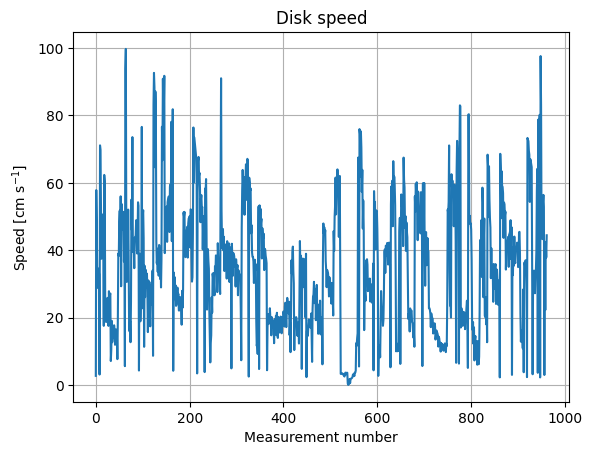

In [120]:
plt.plot(np.sqrt(df[-1])[df[-1] < 10000])
plt.xlabel('Measurement number')
plt.ylabel('Speed [cm s$^{-1}$]')
plt.title('Disk speed')
plt.grid()
plt.show()

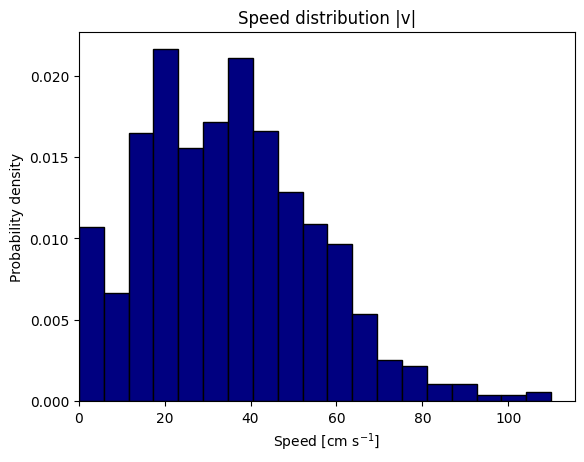

In [121]:
plt.hist(np.sqrt(df[-1]), bins=np.linspace(0, 110, 20), density=True, fc='navy', ec='k')
plt.xlim(0)
plt.xlabel('Speed [cm s$^{-1}$]')
plt.ylabel('Probability density')
plt.title('Speed distribution |v|')
plt.show()

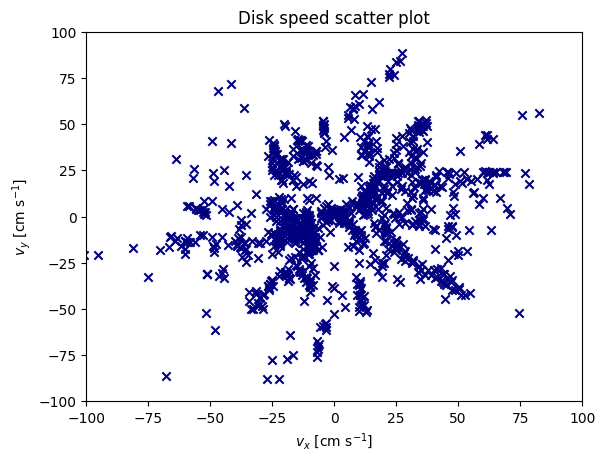

In [122]:
plt.scatter(df[3], df[4], marker='x', color='navy')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('$v_x$ [cm s$^{-1}$]')
plt.ylabel('$v_y$ [cm s$^{-1}$]')
plt.title('Disk speed scatter plot')
plt.show()

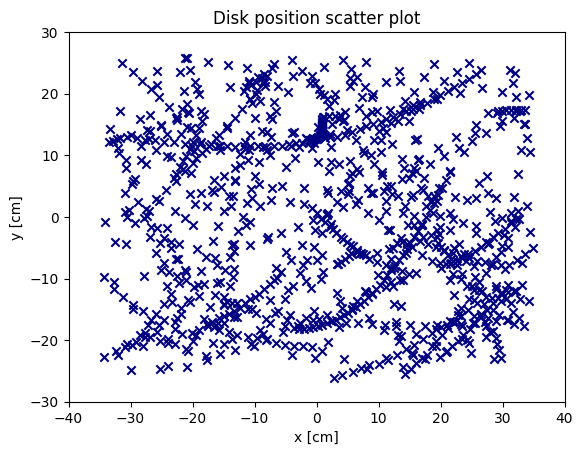

In [123]:
plt.scatter(df[1], df[2], marker='x', color='navy')
plt.xlim(-40, 40)
plt.ylim(-30, 30)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Disk position scatter plot')
plt.show()